In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BusData.csv'
df = pd.read_csv(url)
df.head(10)

,Arrival_time,Stop_id,Bus_id,Line_id,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,01/05/2022 07:03,10033,41355,1,-23,0,39,-4,28.641509
1,01/05/2022 07:21,10033,41356,1,168,0,39,181,27.880597
2,01/05/2022 07:37,10033,44400,1,231,0,39,244,27.852941
3,01/05/2022 07:50,10033,44399,1,150,17,39,143,27.826087
4,01/05/2022 19:29,10033,44060,1,965,35,51,947,42.029412
5,01/05/2022 19:58,10033,41351,1,33,19,46,30,38.970588
6,01/05/2022 20:14,10033,44399,1,75,26,46,63,38.840580
7,01/05/2022 20:28,10033,41356,1,58,15,46,52,34.059701
8,01/05/2022 20:57,10033,44060,1,904,35,46,888,34.102941
9,01/05/2022 21:00,10033,41357,1,141,12,46,140,34.000000


In [2]:
df.shape

(2179, 9)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Arrival_time           2179 non-null   object 
 1   Stop_id                2179 non-null   int64  
 2   Bus_id                 2179 non-null   int64  
 3   Line_id                2179 non-null   int64  
 4   Arrival_delay          2179 non-null   int64  
 5   Dwell_time             2179 non-null   int64  
 6   Scheduled_travel_time  2179 non-null   int64  
 7   Upstream_stop_delay    2179 non-null   int64  
 8   Recurrent_delay        2179 non-null   float64
dtypes: float64(1), int64(7), object(1)
memory usage: 153.3+ KB


In [4]:
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id','Scheduled_travel_time'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Arrival_delay        2179 non-null   int64  
 1   Dwell_time           2179 non-null   int64  
 2   Upstream_stop_delay  2179 non-null   int64  
 3   Recurrent_delay      2179 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 68.2 KB


In [6]:
corr_matrix = df.corr()
corr_matrix['Arrival_delay'].sort_values(ascending=False)

,Arrival_delay
Arrival_delay,1.000000
Upstream_stop_delay,0.993935
Dwell_time,0.218745
Recurrent_delay,0.162692


In [7]:
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3 ],
    'max_depth': [1, 2, 3],
    'subsample': [0.5,0.7,0.9],
    'colsample_bytree': [0.5,0.7,0.9]
}

model = xgb.XGBRegressor()
grid_search = GridSearchCV(model, param_grid, cv=5, verbose=2)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

print("Best Parameters:", best_params)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 189 candidates, totalling 945 fits
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=1, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=1, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=1, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=1, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=1, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=1, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=1, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=1, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=1, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_

In [8]:
best_xgb = xgb.XGBRegressor(colsample_bytree=best_params['colsample_bytree'], learning_rate=best_params['learning_rate'], max_depth=best_params['max_depth'], subsample=best_params['subsample'])
best_xgb.fit(X_train, y_train)

y_pred = best_xgb.predict(X_test)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error")
print(MAE)
print("")
print("Mean Squared Error")
print(MSE)
print("")
print("R-squared")
print(R2)
print("")
print("Root Mean Squared Error")
print(RMSE)
print("")

Mean Absolute Error
10.815879552291895

Mean Squared Error
222.5061335913959

R-squared
0.9925383486976029

Root Mean Squared Error
14.91663948721011



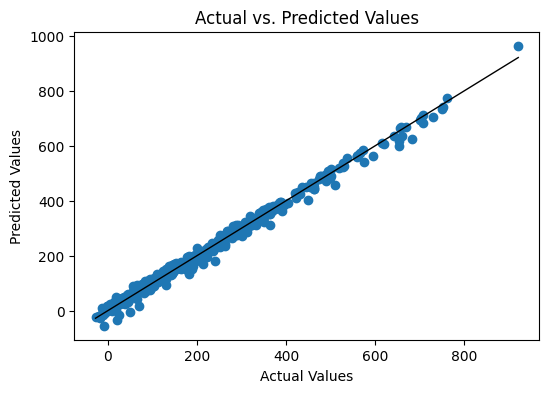

In [9]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='black', lw=1)
plt.show()

The model takes in parameters that are not correlated to each other. For instance the parameter Schedueled_travel_time was removed due to its high correlation to the parameter Recurrent_delay. This is done to make the model simpler with less redundancy. The training/testing split is done 80/20 which is a usual split.

The best parameters for my xGBoost model is: 'colsample_bytree': 0.7, 'learning_rate': 0.15, 'max_depth': 3, 'subsample': 0.9
The parameters were determined by using a gridsearch function with intervals that were suggested from...

Mean Absolute Error
10.815879552291895

Mean Squared Error
222.5061335913959

R-squared
0.9925383486976029

Root Mean Squared Error
14.91663948721011

R-squared tells us that the model is a good fit. The result is very close to one which indicates a good fit. The RMSE is also good. The interpretation of the RMSE is done by looking at how big the the range of predicted values are in comparison to the RMSE. The range of values are between 0-800 and the RMSE is about 15, which gives an error of about 1.9%.
Source: https://statisticsbyjim.com/regression/root-mean-square-error-rmse/

In addition to solving the bus problem, this could possibly be applied to other transport sectors such as train, ferry etc.